# Install

* pip install pandas
* pip install matplotlib
* pip install seaborn
* pip install -U scikit-learn

# Imports

In [85]:
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Carregar o dataset Iris

In [86]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Exibir as primeiras linhas do DataFrame

In [87]:
print('Primeiras linhas do dataset:')
print(iris_df.head())

Primeiras linhas do dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


# Estatísticas Descritivas

In [88]:
print('Estatísticas Descritivas:')
print(iris_df.describe())

Estatísticas Descritivas:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


# Contagem de cada espécie

In [89]:
print('Contagem de cada espécie:')
print(iris_df['species'].value_counts())

Contagem de cada espécie:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


# Boxplots para cada característica por espécie

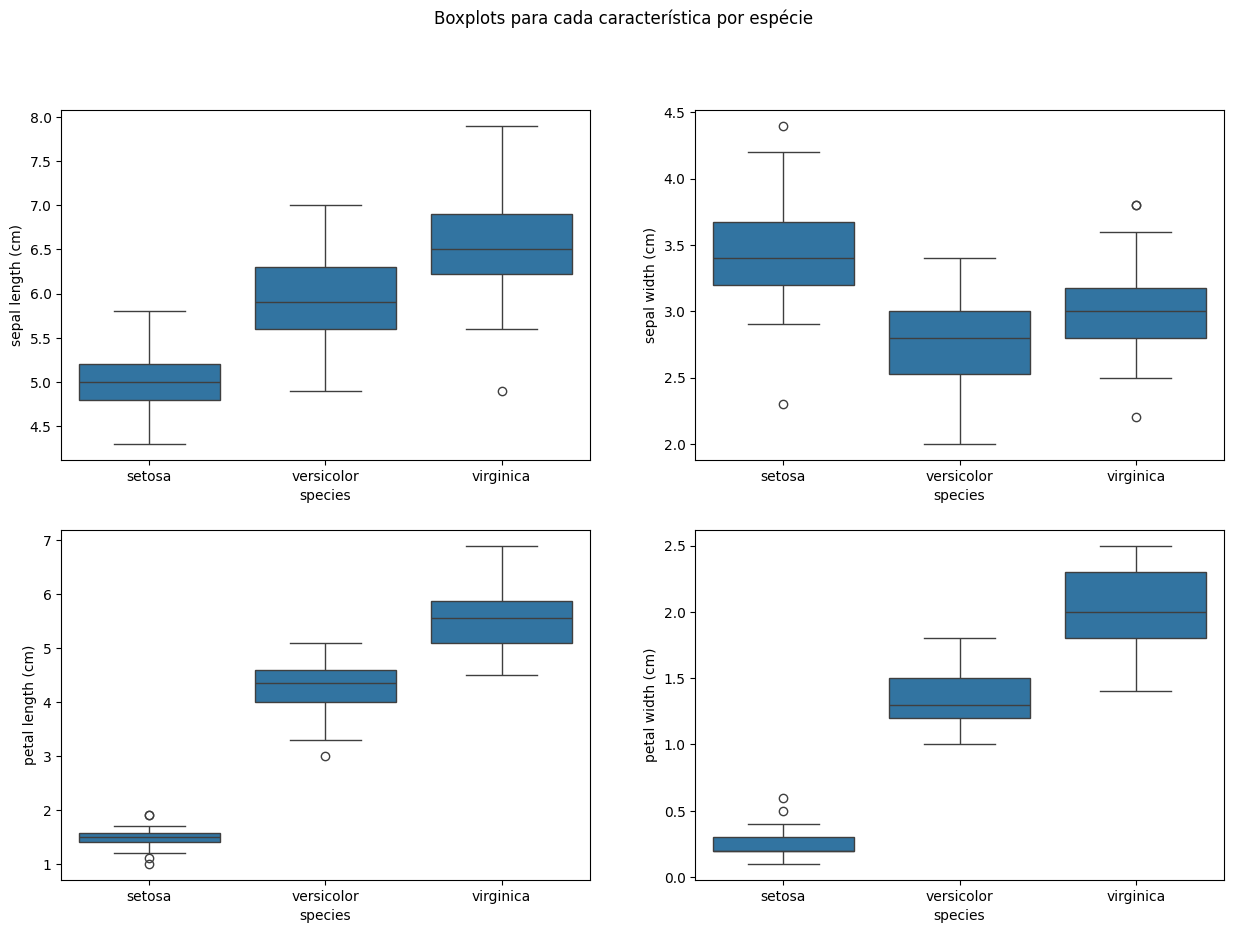

In [90]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2,2,i+1)
    sns.boxplot(x='species', y=feature, data=iris_df)
plt.suptitle('Boxplots para cada característica por espécie')
plt.show()

# Pairplot com mapeamento de cor por espécie

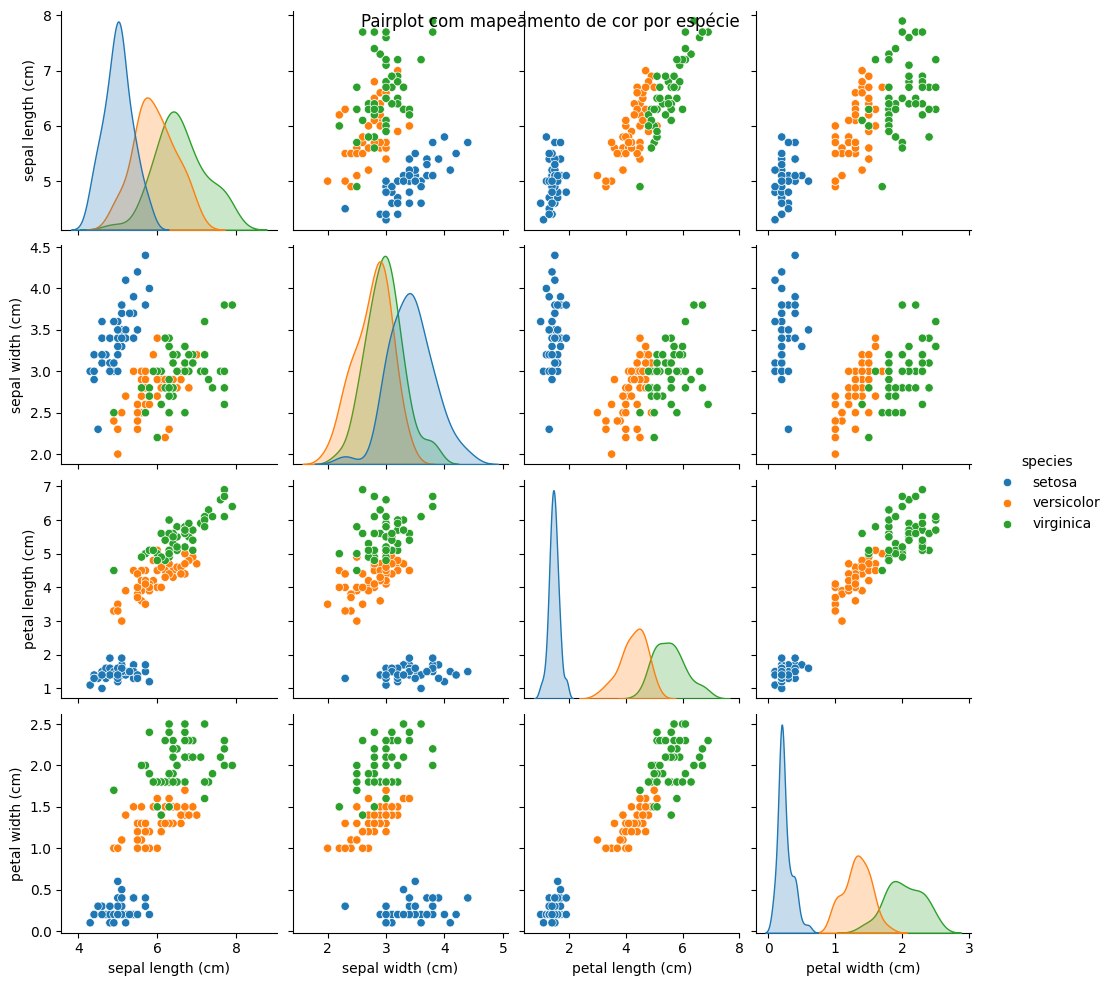

In [91]:
sns.pairplot(iris_df, hue='species')
plt.suptitle('Pairplot com mapeamento de cor por espécie')
plt.show()

# Mapa de calor da correlação entre características

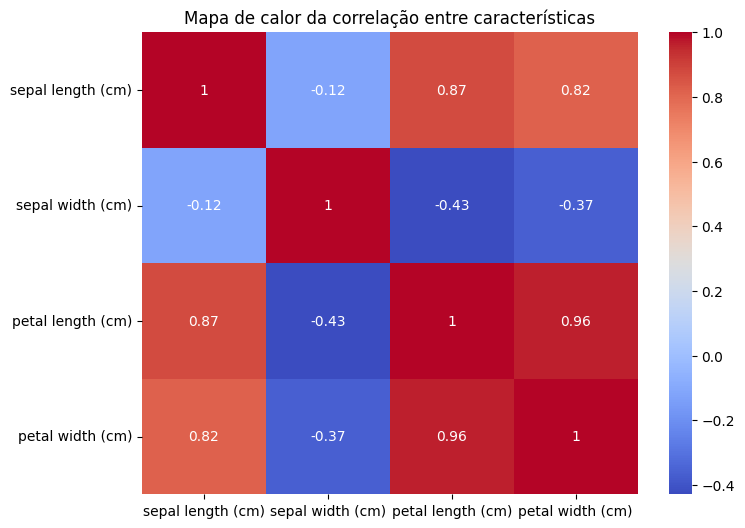

In [92]:
plt.figure(figsize=(8,6))
sns.heatmap(iris_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Mapa de calor da correlação entre características')
plt.show()

# Pré-processamento: Divisão em treino e teste

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

# Exemplo de Regressão Linear

In [94]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Regressão Linear - Predições e Visualização

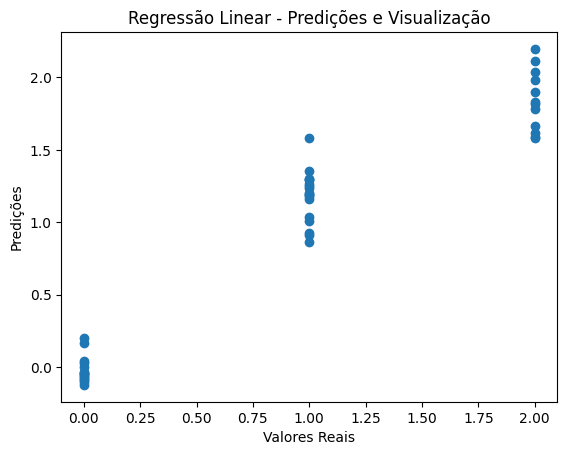

In [95]:
predictions = model.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.title('Regressão Linear - Predições e Visualização')
plt.show()

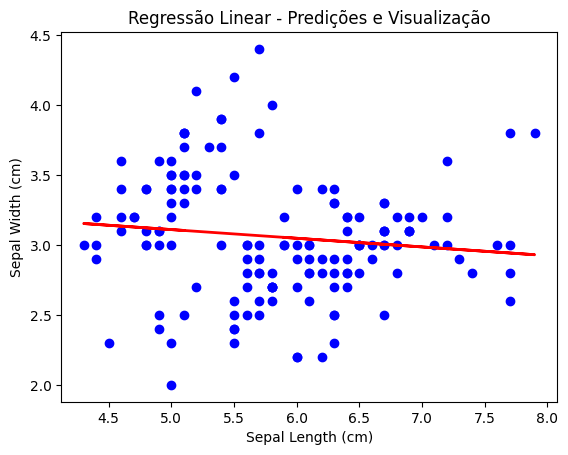

In [96]:
import numpy as np
X = iris.data[:, 0] # Sepal Length
Y = iris.data[:, 1] # Sepal Width

# Redimensionar X para 2D (necessário para o scikit-learn)
# X.reshape(-1,1) transforma X de um array unidimensional (por exemplo [a, b, c] para um array bidimensional)
# O scikit-learn espera que X (os dados das variáveis independentes) seja sempre um array bidimensional.

X = X.reshape(-1,1)

# Ajusta o modelo de regressão linear
model = LinearRegression()
model.fit(X, Y)

# Previsões para a linha de regressão
Y_fit = model.predict(X)

# Plotar os dados e a linha de regressão
plt.scatter(X, Y, color='blue')
plt.plot(X, Y_fit, color='red', linewidth=2)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Regressão Linear - Predições e Visualização')
plt.show()

# Importação

In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Pré-processamento: Divisão em treino e teste

In [98]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

# Exemplo de Árvore de Decisão

In [99]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

# Avaliação do Modelo

In [100]:
predictions = tree_model.predict(X_test)

# Matriz de Confusão

In [101]:
conf_matrix = confusion_matrix(y_test, predictions)
print('Matriz de Confusão:\n', conf_matrix)

Matriz de Confusão:
 [[20  0  0]
 [ 0 10  2]
 [ 0  0 13]]


# Relatório de Classificação

In [102]:
class_report = classification_report(y_test, predictions)
print('Relatório de Classificação:\n', class_report)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.83      0.91        12
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.94      0.95        45
weighted avg       0.96      0.96      0.96        45



# Visualização da Árvore

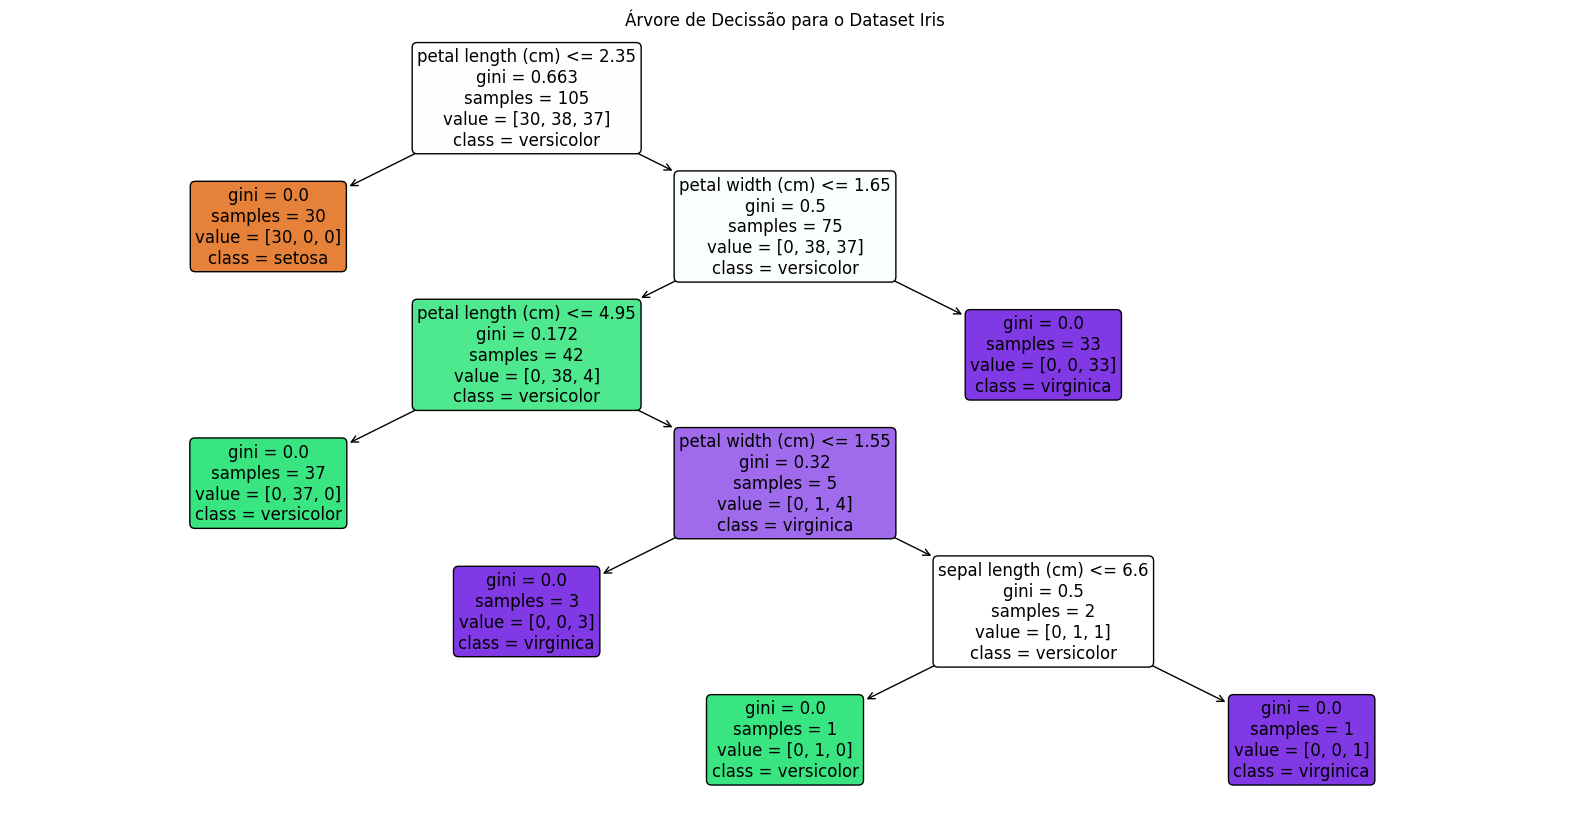

In [103]:
plt.figure(figsize=(20,10))
tree.plot_tree(tree_model,
               feature_names = iris.feature_names,
               class_names = iris.target_names,
               filled = True,
               rounded = True,
               fontsize = 12)
plt.title('Árvore de Decissão para o Dataset Iris')
plt.show()

# Importação

In [104]:
from sklearn.neural_network import MLPClassifier

# Modelo de Rede Neural

In [105]:
neural_model = MLPClassifier(hidden_layer_sizes=(10,5), max_iter=1000)
neural_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)

# Avaliação do Modelo

In [106]:
predictions = neural_model.predict(X_test)

# Matriz de confussão

In [107]:
conf_matrix = confusion_matrix(y_test, predictions)
print('Matriz de Confusão:\n', conf_matrix)

Matriz de Confusão:
 [[20  0  0]
 [ 0 12  0]
 [ 0  0 13]]


# Relatório de Classificação

In [108]:
class_report = classification_report(y_test, predictions)
print('Relatório de Classificação:\n', class_report)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Configuração da Rede Neural

In [109]:
layer_sizes = [X_train.shape[1]] + list(neural_model.hidden_layer_sizes) + [y_train.max() + 1]

# Criação do gráfico

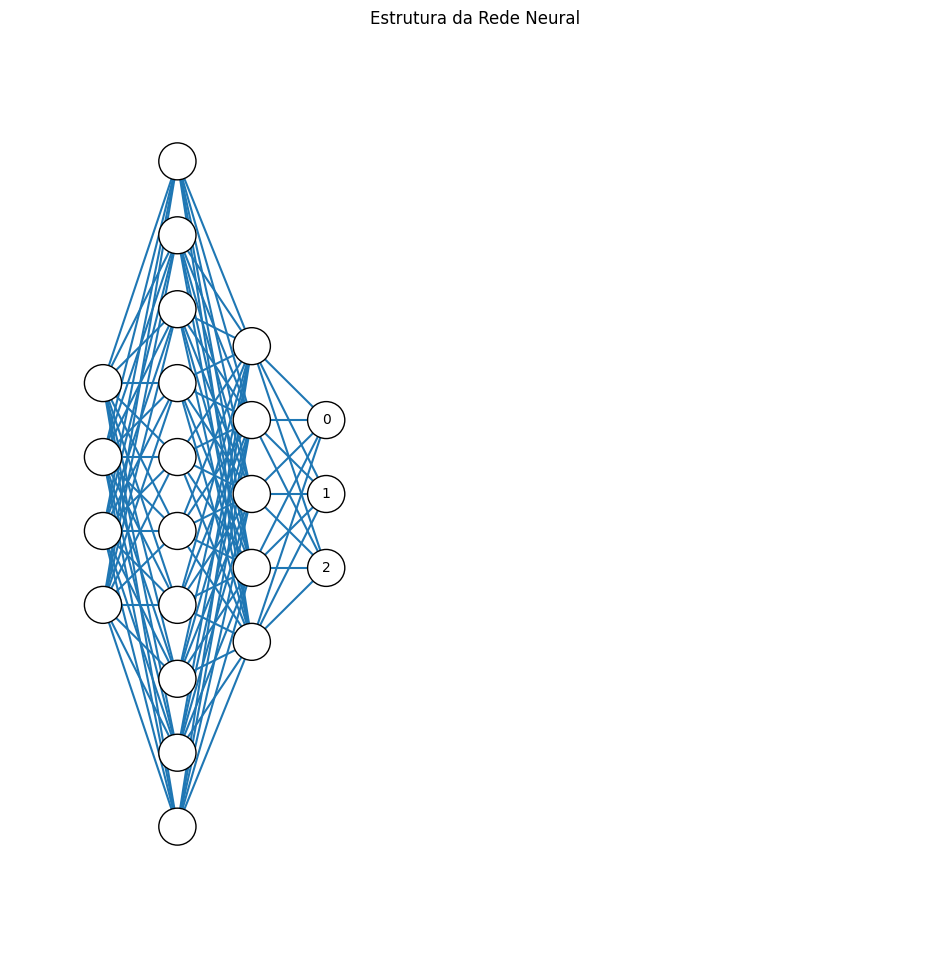

In [110]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Desenha um diagrama básico da rede neural.
    '''

    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(max(layer_sizes))

    # Neurônios
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size):
            circle = plt.Circle((n * h_spacing + left, layer_top - m * v_spacing), v_spacing / 4., color='w', ec='k', zorder=5)
            ax.add_artist(circle)
            # Etiquetas
            if n == len(layer_sizes) - 1:
                ax.text(n * h_spacing + left, layer_top - m * v_spacing, str(m), ha='center', va='center', zorder=5)

    # Coneções
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2. + (top + bottom) / 2.
        layer_top_b = v_spacing * (layer_size_b - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n * h_spacing + left, (n + 1) * h_spacing + left],
                                  [layer_top_a - m * v_spacing, layer_top_b - o * v_spacing], zorder=0)
                ax.add_artist(line)

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes)
plt.title("Estrutura da Rede Neural")
plt.show()


# Importações

In [111]:
from sklearn.neighbors import KNeighborsClassifier

# Modelo KNN

In [112]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Avaliação do modelo 

In [113]:
predictions = neural_model.predict(X_test)

# Matriz de confussão

In [114]:
conf_matrix = confusion_matrix(y_test, predictions)
print('Matriz de Confusão:\n', conf_matrix)

Matriz de Confusão:
 [[20  0  0]
 [ 0 12  0]
 [ 0  0 13]]


# Relatório de Classificação

In [115]:
class_report = classification_report(y_test, predictions)
print('Relatório de Classificação:\n', class_report)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Visualização do KNN

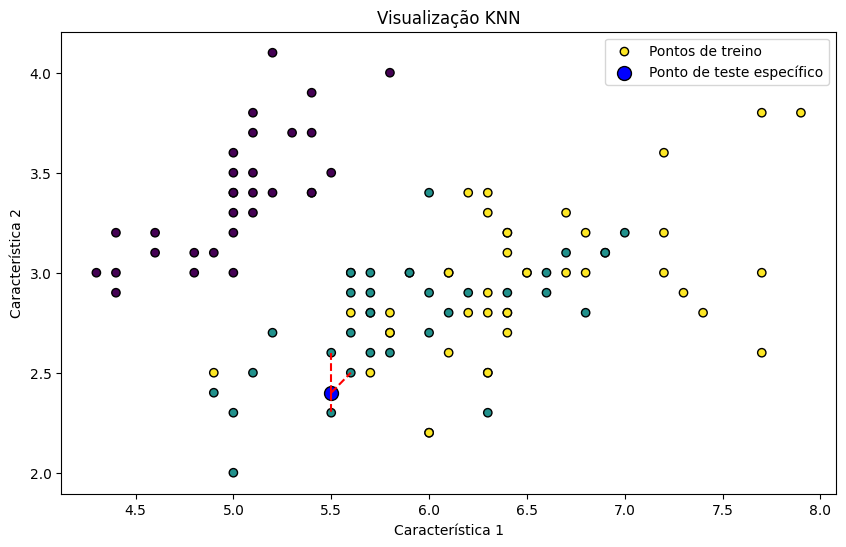

In [117]:
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
import matplotlib.pyplot as plt

# Assume you have X_train, y_train, X_test, and y_test defined

# Escolher apenas as duas primeiras características para visualização
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

# Treina o modelo KNN
knn_2d = KNeighborsClassifier(n_neighbors=3)
knn_2d.fit(X_train_2d, y_train)

# Encontra os 4 vizinhos mais próximos de um ponto de teste específico (incluindo o próprio ponto)
point = X_test_2d[0]  # Exemplo: primeiro ponto de teste
neighbors = NearestNeighbors(n_neighbors=4)  
neighbors.fit(X_train_2d)
distances, indices = neighbors.kneighbors([point])

# Visualização
plt.figure(figsize=(10, 6))

# Pontos de treino
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap='viridis', marker='o', edgecolors='k', label='Pontos de treino')

# Ponto de teste específico
plt.scatter(*point, c='blue', marker='o', edgecolors='k', s=100, label='Ponto de teste específico')

# Linhas para os vizinhos mais próximos
for i in indices[0]:
    plt.plot([point[0], X_train_2d[i, 0]], [point[1], X_train_2d[i, 1]], color='red', linestyle='--')

plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Visualização KNN')
plt.legend()
plt.show()
